# Desafio Descomplica

**1- NPS**
<br>O Net Promoter Score é a métrica de lealdade de clientes mais difundida para serviços
<br>Na aba "Item 1" há uma pequena amostra de avaliação de alunos dos nossos cursos de vestibular
<br>Como você avaliaria estes dados? o que poderia tirar da pergunta aberta?

**2- Propensão**
<br>Gostariamos de prever alunos propensos à renovação de plano a partir de seu historico de interações com a plataforma
<br>Na aba "Item 2" há uma base de 1000 alunos com as interações em 1 semestre e uma flag em que 1 indica que houve renovação de plano
<br>Quais aprendizados você pode tirar do produto com esta análise? Como indicaria que se trabalhasse a propensão à renovação?

**3- Insights Mídia**
<br>Hoje temos um alto investimento em mídia online e isto define muito dos nossos acessos ao site e do nosso resultado de vendas
<br>Na aba "Item 3" há dados captados em 2 anos pelo Google Analytics
faça uma analise comparativa entre os anos e tire conclusões possíveis sobre as mídias que foram trabalhadas

### Carregando as Bibliotecas

In [75]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords

### Importando os dados

In [76]:
dir_path = os.getcwd()

df1 = pd.read_excel(dir_path+'/TesteEspecialistaDataScience.xlsx', sheet_name='Item 1', encoding = 'ISO-8859-1')
#df1 = pd.read_csv('teste.csv', delimiter = ';', encoding = 'utf-8')
df2 = pd.read_excel(dir_path+'/TesteEspecialistaDataScience.xlsx', sheet_name='Item 2', encoding = 'ISO-8859-1')
df3 = pd.read_excel(dir_path+'/TesteEspecialistaDataScience.xlsx', sheet_name='Item 3', encoding = 'ISO-8859-1')

In [77]:
def descricao_dados(df):
    print('='*80)
    print('='*5+' Dimensão da base de dados: {} colunas e {} registros.'.format(df.shape[1], df.shape[0]))
    print('='*80)
    print('='*5+' Colunas:')
    print(', \n'.join(['== '+x for x in df.columns.values]))
    print('='*80)
    print(df1.info())
    print('='*80)

In [78]:
def aplicar_encode(i):
    try:
        x = i.encode('utf-8')
        return x
    except:
        return i

## 1- NPS
<br>O Net Promoter Score é a métrica de lealdade de clientes mais difundida para serviços
<br>Na aba "Item 1" há uma pequena amostra de avaliação de alunos dos nossos cursos de vestibular
<br>Como você avaliaria estes dados? o que poderia tirar da pergunta aberta?

### 1.1 Descrição dos dados

In [79]:
descricao_dados(df1)

===== Dimensão da base de dados: 3 colunas e 240 registros.
===== Colunas:
== id, 
== Qual é a probabilidade de você recomendar Descomplica a seus amigos e colegas?, 
== O que poderíamos fazer para melhorar?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
id                                                                                240 non-null int64
Qual é a probabilidade de você recomendar Descomplica a seus amigos e colegas?    240 non-null int64
O que poderíamos fazer para melhorar?                                             49 non-null object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB
None


### 1.2 Análise Exploratória dos Dados (EDA)

Alteração do nome das colunas para facilitar a análise

In [80]:
df1.columns = ['id', 'prob_recomendar', 'melhoria']

Verificando a frequência das avaliações dos alunos

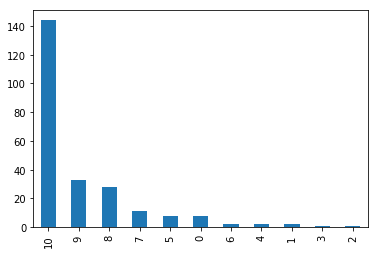

In [81]:
df1['prob_recomendar'].value_counts().plot(kind='bar')

In [83]:
df1['prob_recomendar'].value_counts(normalize = True)

10    0.600000
9     0.137500
8     0.116667
7     0.045833
5     0.033333
0     0.033333
6     0.008333
4     0.008333
1     0.008333
3     0.004167
2     0.004167
Name: prob_recomendar, dtype: float64

*É possível veriricar que 60% da base amostral avaliou o curso de vestibular com a nota máxima, ou seja, aproximadamente 2 a cada 3 alunos se mostraram totalmente satisfeitos com o curso.*

Criação de níveis de avaliação para análise dos comentários

In [121]:
# Definiação dos intervalos
bins = [-1,4,5,10]
# Aplicação dos intervalos e a criação de uma nova coluna no dataframe
df1['prob_nivel'] = pd.cut(df1['prob_recomendar'], bins, labels = ['baixo','medio','alto'])
df1['prob_nivel'].value_counts(normalize = True)

alto     0.908333
baixo    0.058333
medio    0.033333
Name: prob_nivel, dtype: float64

**Nível de avaliação x comentários realizados**

In [127]:
qtd_melhoria = df1['melhoria'].notnull().sum()
print('De {} registros da base amostral, {} ({:.2%}) dos alunos preencheram o campo de melhoria.'.
     format(df1.shape[0],
            qtd_melhoria,
            float(qtd_melhoria)/df1.shape[0]))

De 240 registros da base amostral, 49 (20.42%) dos alunos preencheram o campo de melhoria.


**Plotagem amostral dos comentários por nível de satisfação**

In [85]:
def print_nivel_melhoria(i):
    registro = df1.iloc[i]
    m = df1['melhoria'].iloc[i].encode('utf-8')[:60]
    n = df1['prob_nivel'].iloc[i].encode('utf-8').upper()
    print('{} \t  :\t {}'.format(n,m))

In [125]:
print("Nivel NPS : \t Comentários melhorias\n")
for i in range(10):
    indice = df1[ (~df1['melhoria'].isna()) & (df1['prob_nivel'] == 'alto') ].sample(1).index[0]
    #print(indice)
    print_nivel_melhoria(indice)

Nivel NPS : 	 Comentários melhorias

ALTO 	  :	 Nada, são simplesmente perfeitos!
ALTO 	  :	 Apenas uma sugestão: Colocar a opção de transmitir as aul
ALTO 	  :	 Amo
ALTO 	  :	 poderia baixar arquivos
ALTO 	  :	 aulas de redação para a unesp , conclusão sem proposta de
ALTO 	  :	 aulas de redação para a unesp , conclusão sem proposta de
ALTO 	  :	 Nada, são simplesmente perfeitos!
ALTO 	  :	 Continuar com essa equipe maravilhosa que estão sempre disp
ALTO 	  :	 bom
ALTO 	  :	 ta tudo pefeito


In [126]:
print("Nivel NPS : \t Comentários melhorias\n")
for i in range(10):
    indice = df1[ (~df1['melhoria'].isna()) & (df1['prob_nivel'] == 'baixo') ].sample(1).index[0]
    print_nivel_melhoria(indice)

Nivel NPS : 	 Comentários melhorias

BAIXO 	  :	 tudo
BAIXO 	  :	 tudo
BAIXO 	  :	 tudo
BAIXO 	  :	 uma porcaria
BAIXO 	  :	 tudo
BAIXO 	  :	 tudo
BAIXO 	  :	 uma porcaria
BAIXO 	  :	 tudo
BAIXO 	  :	 uma porcaria
BAIXO 	  :	 tudo


In [130]:
df1[ df1['prob_nivel'] == 'medio' ]['melhoria'].notnull().sum()

0

*Nenhuma avaliação de nível médio contém comentário para melhoria.*

**Análise da quantidade de palavras**

In [132]:
# Função para remoção de acentos nas palavras
from unicodedata import normalize
def remover_acentos(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

Criação dos dicionários pelos níveis de avaliação

In [134]:
contador_alto = Counter()
contador_baixo = Counter()
contador_total = Counter()

for i in df1[~df1['melhoria'].isna()].index:
    m = remover_acentos( df1['melhoria'].iloc[i] ).encode('utf-8').lower()
    n = df1['prob_nivel'].iloc[i]
    
    if n == 'alto':
        for w in nltk.word_tokenize(m):
                contador_alto[w] += 1
                contador_total[w] += 1
    elif n == 'baixo':
        for w in nltk.word_tokenize(m):
            contador_baixo[w] += 1
            contador_total[w] += 1
    else:
        pass

In [141]:
print('Total de palavras encontradas: {}.'.format(len(contador_total)))

Total de palavras encontradas: 311.


Palavras mais comuns no nível de satisfação baixo

In [94]:
contador_baixo.most_common()

[('porcaria', 1), ('uma', 1), ('tudo', 1)]

*Encontrado apenas um comentário no nível de satisfação baixo.*

Palavras mais comuns de nível de satisfação alto

In [142]:
contador_alto.most_common()[:20]

[(',', 29),
 ('.', 23),
 ('de', 21),
 ('aulas', 18),
 ('e', 16),
 ('o', 12),
 ('as', 12),
 ('!', 12),
 ('a', 12),
 ('os', 12),
 ('mais', 11),
 ('que', 8),
 ('com', 8),
 ('para', 8),
 ('por', 7),
 ('das', 6),
 ('nao', 6),
 ('exercicios', 5),
 ('ser', 5),
 ('muito', 5)]

*Entre os elementos mais frequentes, foram encontrados muita pontuação e palavras que não possuem poder significativo. Será feita uma limpeza no dataset para eliminar esses casos.*

Limpeza do dataset removendo as stopwords e pontuação

In [144]:
for i in stopwords.words('portuguese'):
    del(contador_alto[i])
    del(contador_total[i])
    
lista_para_excluir = [',' , '.' , ';', '!']
for i in lista_para_excluir:
    del(contador_alto[i])
    del(contador_total[i])
    
contador_alto.most_common()[:20]

[('aulas', 18),
 ('nao', 6),
 ('exercicios', 5),
 ('ser', 5),
 ('redacao', 5),
 ('colocar', 5),
 ('melhorar', 4),
 ('sao', 4),
 ('tudo', 3),
 ('estudo', 3),
 ('estao', 3),
 ('acho', 3),
 ('cada', 3),
 ('gravadas', 3),
 ('excelente', 3),
 ('aplicativo', 3),
 ('menos', 2),
 ('ajudar', 2),
 ('nada', 2),
 ('possivel', 2)]

In [146]:
print('Total de palavras encontradas após a limpeza do dataset: {}.'.format(len(contador_total)))

Total de palavras encontradas após a limpeza do dataset: 268.


## 2- Propensão
<br>Gostariamos de prever alunos propensos à renovação de plano a partir de seu historico de interações com a plataforma
<br>Na aba "Item 2" há uma base de 1000 alunos com as interações em 1 semestre e uma flag em que 1 indica que houve renovação de plano
<br>Quais aprendizados você pode tirar do produto com esta análise? Como indicaria que se trabalhasse a propensão à renovação?

### 2.1 Descrição dos dados

In [148]:
descricao_dados(df2)

===== Dimensão da base de dados: 6 colunas e 999 registros.
===== Colunas:
== aluno_id, 
== aula_online, 
== aula_gravada, 
== exercicios, 
== simulados, 
== renovação
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
id                 240 non-null int64
prob_recomendar    240 non-null int64
melhoria           49 non-null object
prob_nivel         240 non-null category
dtypes: category(1), int64(2), object(1)
memory usage: 6.0+ KB
None
